# Exploratory Data Analysis

### Predicting Breast Cancer Survival Time: RSF Model

Dataset can be found by downloading "Supplementary Data 3" in the following link: https://www.nature.com/articles/s41523-021-00319-4#MOESM5

#### Import Libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

%matplotlib inline

#### Load Data

In [27]:
df = pd.read_csv("../data/raw/breast_cancer_data_raw.csv")

#### Preview Data
Displays column names and first few rows

In [28]:
#Preview of dataset (prints column names and first few rows)
df.head()

,Patient,Mutation,MAF of gene used at baseline,MAF of gene used at 4 weeks,CTCs counts at baseline,CTCs counts at 4 weeks,AGE,PS,metastatic site,N of met. Sites,...,OS at baseline,Status OS,PFS at baseline,Status PFS,PFS from weeks 4,OS from weeks 4,meno.status,MFI,Met.sites,Histology
0,1,No mutated,0.00,NaN,0,0.0,69,0,Visceral,< 3,...,20,1,6,1,5,19,Postmenopausal,Sup à 6 months,Other,Other
1,3,PTEN,9.44,0.00,0,0.0,73,0,No visceral,< 3,...,33,1,16,1,15,32,Postmenopausal,Sup à 6 months,Other,Lobular
2,5,PTEN,4.27,0.00,6,0.0,37,0,Visceral,< 3,...,61,0,23,1,22,60,Premenopausal,Sup à 6 months,Liver +/- other,Other
3,6,TP53,14.60,0.34,7,1.0,41,1,Visceral,>=3,...,31,1,8,1,7,30,Premenopausal,Sup à 6 months,Other,Lobular
4,11,PIK3CA,9.62,0.00,10,0.0,48,0,No visceral,>=3,...,31,1,13,1,12,30,Premenopausal,<= 6 months,Other,Other


#### Understanding Columns
##### Features in the Dataset
- **Patient ID**: Identifier, not feature for prediction.
- **Mutation**: Genetic mutations present in cancerous cells (e.g., PTEN, TP53, PIK3CA) which can influence the aggressiveness of the cancer and potential response to therapy.
- **MAF of Gene at Baseline and 4 Weeks**: Measures the mutation allele frequency (MAF) at baseline and after 4 weeks, providing insights into the genetic evolution of the tumor under treatment.
- **CTCs Counts at Baseline and 4 Weeks**: Circulating tumor cells (CTCs) can indicate the extent of tumor burden and might predict metastasis.
- **Age**: Age of the patient at diagnosis, which is a known risk factor in breast cancer prognosis.
- **PS (Performance Status)**: A measure of how the disease affects a patient's daily living abilities; lower scores typically indicate better functioning.
- **Metastatic Site**: The location of metastases can influence prognosis; for example, visceral metastases are often associated with poorer outcomes compared to bone metastases.
- **Number of Metastatic Sites**: Indicates disease burden; more sites can correlate with a more advanced or aggressive disease.
- **Subtype**: Breast cancer subtype (e.g., Triple Negative, RH+) which is crucial for determining treatment strategy and prognosis.
- **Tumor Grade**: Indicates the aggressiveness of the tumor based on how much the cancer cells differ from healthy cells.
- **OS (Overall Survival) at Baseline and OS from Weeks 4**: Survival time from the initial diagnosis and from week 4 respectively.
- **Status OS**: The status (e.g., alive, deceased) at the last follow-up, potentially used as a target variable for survival analysis.
- **PFS (Progression-Free Survival) at Baseline and PFS from Weeks 4**: Time during and after the treatment that the patient lives without the disease worsening.
- **Status PFS**: Similar to Status OS, indicates whether the disease has progressed as of the last follow-up.
- **Menopausal Status**: Hormonal status can impact the disease's behavior and treatment responses.
- **MFI (Metastatic Free Interval)**: Time between initial diagnosis and the development of metastases.
- **Metastatic Sites**: Specific sites where metastases are present, which could be critical for prognosis.
- **Histology**: The study of the tissue origin and structure of the cancer; certain histological types may be more aggressive.

#### Checking for Missing Values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient                       198 non-null    int64  
 1   Mutation                      198 non-null    object 
 2   MAF of gene used at baseline  198 non-null    float64
 3   MAF of gene used at 4 weeks   191 non-null    float64
 4   CTCs counts at baseline       198 non-null    int64  
 5   CTCs counts at 4 weeks        196 non-null    float64
 6   AGE                           198 non-null    int64  
 7   PS                            198 non-null    int64  
 8   metastatic site               197 non-null    object 
 9   N of met. Sites               197 non-null    object 
 10  subtype                       198 non-null    object 
 11  Tumor grade                   181 non-null    object 
 12  OS at baseline                198 non-null    int64  
 13  Statu

#### Missing Values Detected

Breakdown of where missing values are:

- MAF of gene used at 4 weeks: Out of 198 entries, only 191 are non-null. This means there are 7 missing values in this column.

- CTCs counts at 4 weeks: 196 non-null entries suggest 2 missing values.

- metastatic site: With 197 non-null entries, there is 1 missing value.

- N of met. Sites: Similarly, with 197 non-null entries, there is 1 missing value.

- Tumor grade: There are 17 missing values since only 181 out of 198 entries are non-null.

- meno.status: This has 2 missing values, with 196 non-null entries.

- MFI: There are 4 missing values, as it has 194 non-null entries.

- Met.sites: This also indicates 1 missing value, with 197 non-null entries.

- Histology: There are 3 missing values, with 195 non-null entries.

Handling of missing values is required before analysis can proceed. Techniques such as imputation, removal, or substitution, can be used depending on significance of data and the intended analysis.

#### Figure 1: Count of Survival Status

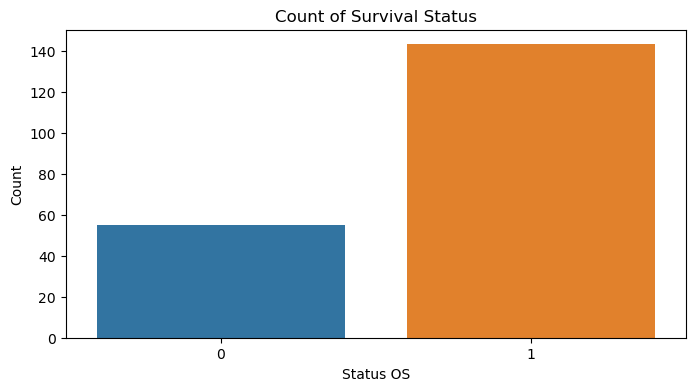

Status OS
1    143
0     55
Name: count, dtype: int64


In [30]:
# Figure 1: Count Plot of Survival Status

# Set up the figure for plotting
plt.figure(figsize=(8, 4))

# Plotting 'Status OS' counts
sns.countplot(x=df["Status OS"])

# Adding title and labels to improve clarity
plt.title('Count of Survival Status')
plt.xlabel('Status OS')
plt.ylabel('Count')

# Display the plot
plt.show()

# Printing the value counts of 'Status OS'
target_status_OS = df["Status OS"].value_counts()
print(target_status_OS)

#### Figure 2: Tumor Grade Distribution

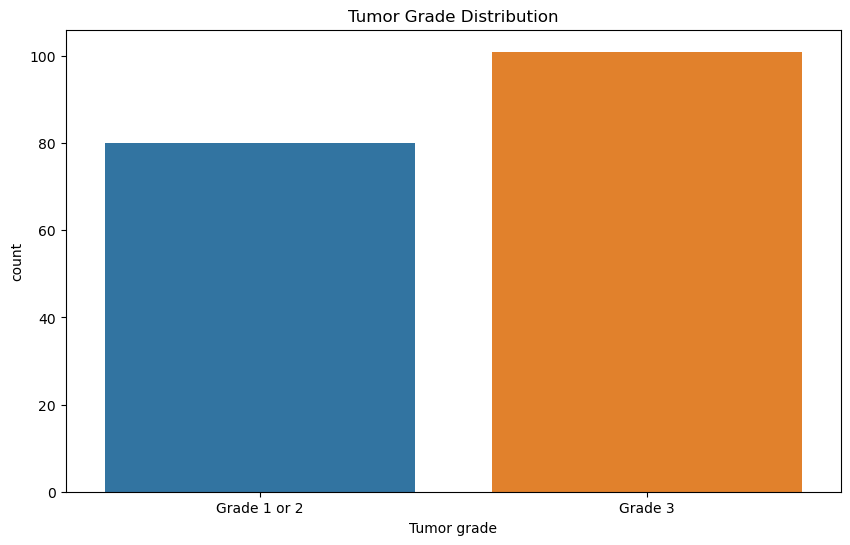

In [31]:
# Figure 2: Tumor Grade Distribution

# Custom labels for the x-axis
custom_labels = ['Grade 1 or 2', 'Grade 3']

# Plot 7: Tumor Grade Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Tumor grade', data=df)
ax.set_title('Tumor Grade Distribution')
ax.set_xticklabels(custom_labels)
plt.show()

#### Figure 3: Kaplan-Meier Curve (Overall Survival)

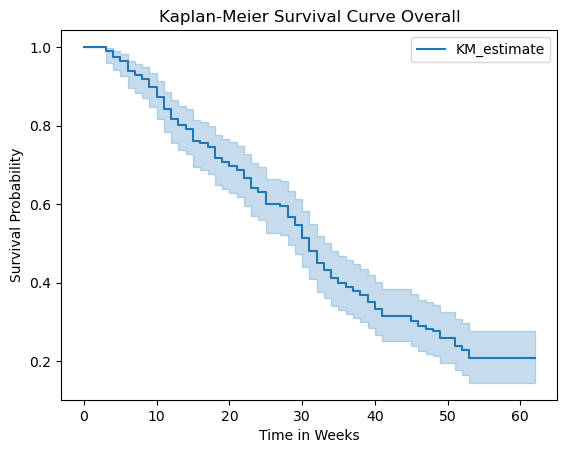

In [32]:
# Figure 3: Kaplan-Meier Curve (Overall Survival)
kmf = KaplanMeierFitter()
kmf.fit(df["OS at baseline"], df["Status OS"])
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve Overall')
plt.xlabel('Time in Weeks')
plt.ylabel('Survival Probability')
plt.show()

#### Table 1:Mutation Counts

In [33]:
# Table 1: Mutation Counts
mutation_counts = df['Mutation'].value_counts()
print(mutation_counts)

Mutation
No mutated    51
TP53          42
PIK3CA        34
GATA3          9
ESR1           9
PTEN           6
ARID1A         4
KMT2C          4
BRCA1          4
GNAS           3
CDH1           3
SF3B1          3
RUNX1T1        2
NOTCH2         2
MAP3K1         2
NCOR1          2
KRAS           2
MAP2K4         2
ERBB2          2
CDKN2A         2
BRCA2          1
RB1            1
NF1            1
MDM4           1
CTNNB1         1
MYC            1
AR             1
ZNF217         1
RUNX1          1
ERBB3          1
Name: count, dtype: int64


#### Figure 4: Kaplan-Meier Curve (Mutation Vs. No Mutation)

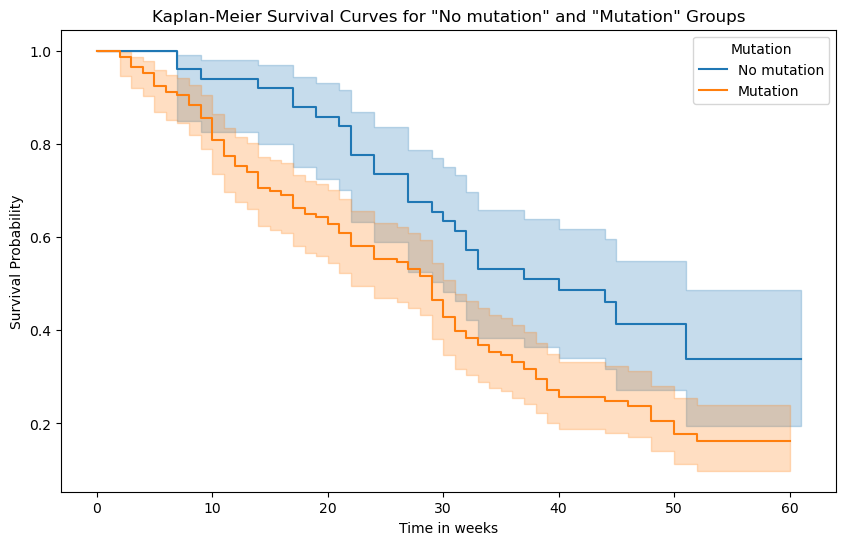

In [34]:
# Figure 4: Kaplan-Meier Curve (Mutation Vs. No Mutation)

# Filter the DataFrame to include only rows where Mutation is "No mutated"
no_mutated_df = df[df['Mutation'] == 'No mutated']

# Filter the DataFrame to include only rows where Mutation is not "No mutated"
mutated_df = df[df['Mutation'] != 'No mutated']

# Initialize KaplanMeierFitter model
kmf_no_mutated = KaplanMeierFitter()
kmf_mutated = KaplanMeierFitter()

# Plotting
plt.figure(figsize=(10, 6))

# Fit the model for the "No mutated" group
kmf_no_mutated.fit(durations=no_mutated_df["OS from weeks 4"], event_observed=no_mutated_df["Status OS"], label='No mutation')
kmf_no_mutated.plot_survival_function()

# Fit the model for the "mutated" group
kmf_mutated.fit(durations=mutated_df["OS from weeks 4"], event_observed=mutated_df["Status OS"], label='Mutation')
kmf_mutated.plot_survival_function()

# Add title and labels
plt.title('Kaplan-Meier Survival Curves for "No mutation" and "Mutation" Groups')
plt.xlabel('Time in weeks')
plt.ylabel('Survival Probability')

# Show legend
plt.legend(title='Mutation')

# Show plot
plt.show()

#### Figure 5: Kaplan-Meier Survival Curves by Specific Mutation (No Mutation, TP53 and PIK3CA Mutation)

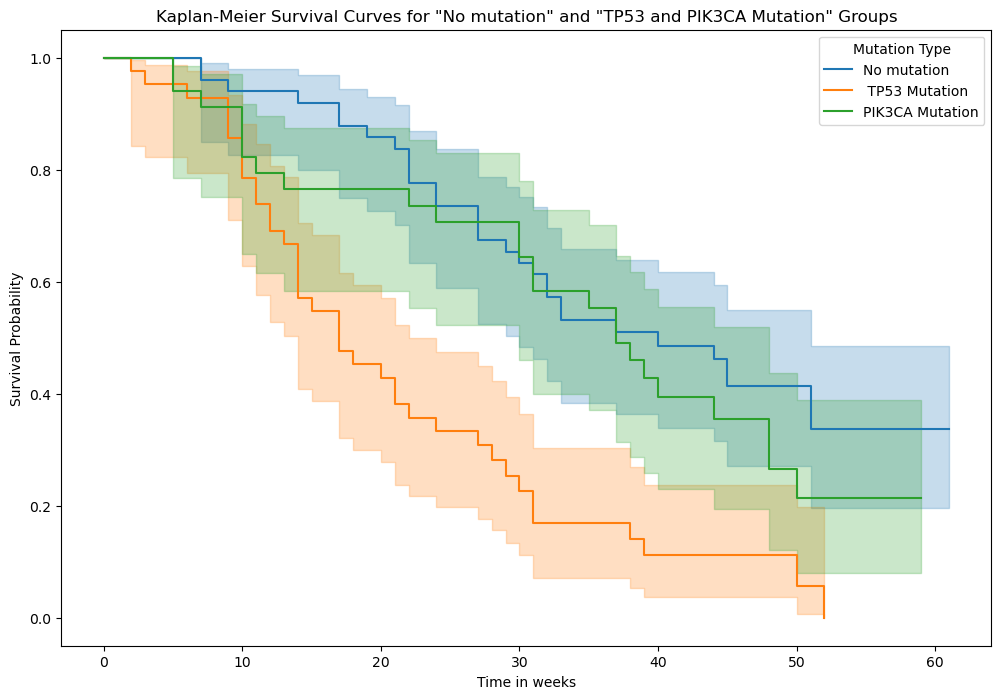

In [35]:
# Figure 5: Kaplan-Meier Survival Curves by Specific Mutation (No Mutation, TP53 and PIK3CA Mutation)

no_mutation = df[df['Mutation'] == 'No mutated']
TP53 = df[df['Mutation'] == 'TP53']
PIK3CA = df[df['Mutation'] == 'PIK3CA']
GATA3 = df[df['Mutation'] == 'GATA3']
ESR1 = df[df['Mutation'] == 'ESR1']

# Inititative KaplanMeierFitter model
kmf_no_mutation = KaplanMeierFitter()
kmf_TP53 = KaplanMeierFitter()
kmf_PIK3CA = KaplanMeierFitter()
kmf_GATA3 = KaplanMeierFitter()
kmf_ESR1 = KaplanMeierFitter()

# Plotting
plt.figure(figsize=(12, 8))

# Fit the model for the "No mutation" group
kmf_no_mutation.fit(durations=no_mutation["OS from weeks 4"], event_observed=no_mutation["Status OS"], label='No mutation')
kmf_no_mutation.plot_survival_function()

# Fit the model for the "TP53" group
kmf_TP53.fit(durations=TP53["OS from weeks 4"], event_observed=TP53["Status OS"], label=' TP53 Mutation')
kmf_TP53.plot_survival_function()

# Fit the model for the "PIK3CA" group
kmf_PIK3CA.fit(durations=PIK3CA["OS from weeks 4"], event_observed=PIK3CA["Status OS"], label='PIK3CA Mutation')
kmf_PIK3CA.plot_survival_function()

# Add title and labels
plt.title('Kaplan-Meier Survival Curves for "No mutation" and "TP53 and PIK3CA Mutation" Groups')
plt.xlabel('Time in weeks')
plt.ylabel('Survival Probability')

# Show legend
plt.legend(title='Mutation Type')

# Show plot
plt.show()

#### Figure 6: Kaplan-Meier Curve by Metastatic Site (Visceral Vs. Non-visceral)

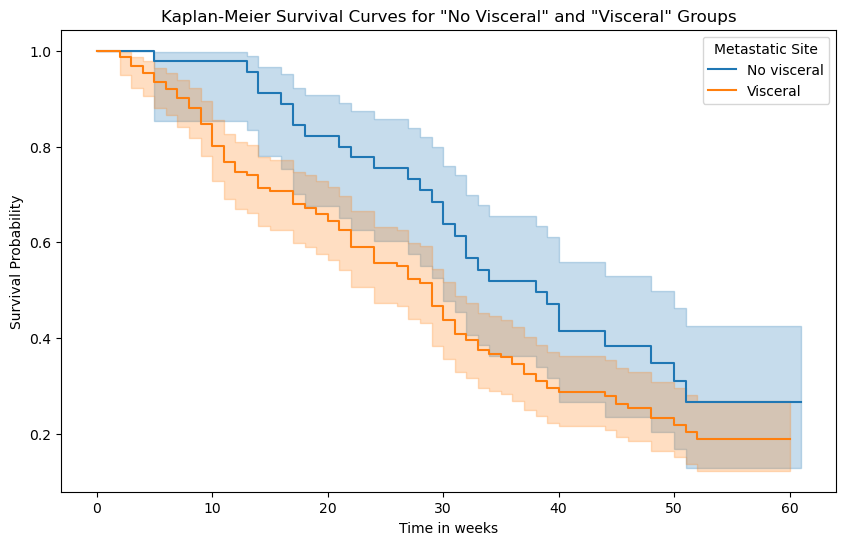

In [36]:
# Figure 6: Kaplan-Meier Curve by Metastatic Site (Visceral Vs. Non-visceral)

# Filter the DataFrame to include only rows where metastatic site is "No visceral"
no_visceral_df = df[df['metastatic site'] == 'No visceral']

# Filter the DataFrame to include only rows where metastatic site is "Visceral"
visceral_df = df[df['metastatic site'] == 'Visceral']

# Initialize KaplanMeierFitter model
kmf_no_visceral = KaplanMeierFitter()
kmf_visceral = KaplanMeierFitter()

# Plotting
plt.figure(figsize=(10, 6))

# Fit the model for the "No visceral" group
kmf_no_visceral.fit(durations=no_visceral_df["OS from weeks 4"], event_observed=no_visceral_df["Status OS"], label='No visceral')
kmf_no_visceral.plot_survival_function()

# Fit the model for the "Visceral" group
kmf_visceral.fit(durations=visceral_df["OS from weeks 4"], event_observed=visceral_df["Status OS"], label='Visceral')
kmf_visceral.plot_survival_function()

# Add title and labels
plt.title('Kaplan-Meier Survival Curves for "No Visceral" and "Visceral" Groups')
plt.xlabel('Time in weeks')
plt.ylabel('Survival Probability')

# Show legend
plt.legend(title='Metastatic Site')

# Show plot
plt.show()

#### # Figure 7: Kaplan-Meier Curve by Tumor Subtype (Triple Negative and RH+ Groups)

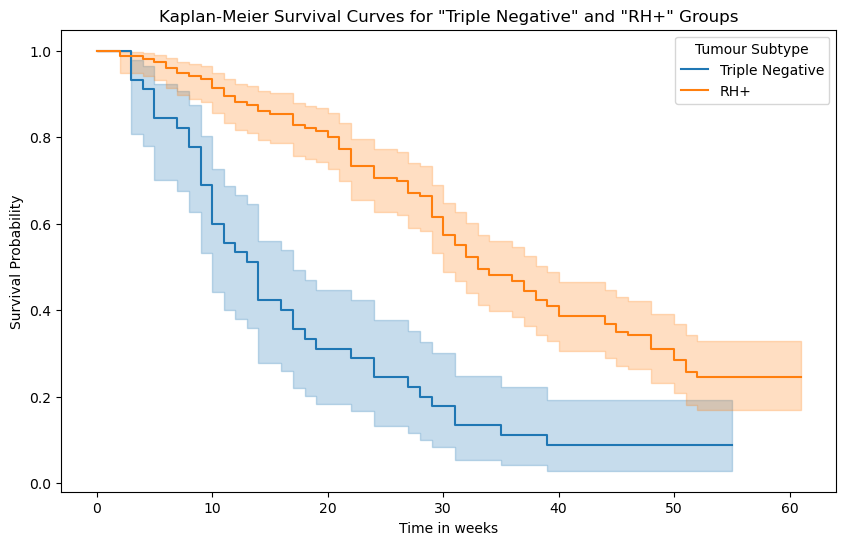

In [37]:
# Figure 7: Kaplan-Meier Curve by Tumor Subtype (Triple Negative and RH+ Groups)

# Filter the DataFrame to include only rows where metastatic site is "No visceral"
triple_negative_df = df[df['subtype'] == 'Triple negative']

# Filter the DataFrame to include only rows where metastatic site is "Visceral"
rh_plus_df = df[df['subtype'] == 'RH+']

# Initialize KaplanMeierFitter model
kmf_triple_negative = KaplanMeierFitter()
kmf_rh_plus = KaplanMeierFitter()

# Plotting
plt.figure(figsize=(10, 6))

# Fit the model for the "No visceral" group
kmf_triple_negative.fit(durations=triple_negative_df["OS from weeks 4"], event_observed=triple_negative_df["Status OS"], label='Triple Negative')
kmf_triple_negative.plot_survival_function()

# Fit the model for the "Visceral" group
kmf_rh_plus.fit(durations=rh_plus_df["OS from weeks 4"], event_observed=rh_plus_df["Status OS"], label='RH+')
kmf_rh_plus.plot_survival_function()

# Add title and labels
plt.title('Kaplan-Meier Survival Curves for "Triple Negative" and "RH+" Groups')
plt.xlabel('Time in weeks')
plt.ylabel('Survival Probability')

# Show legend
plt.legend(title='Tumour Subtype')

# Show plot
plt.show()

In [39]:
print("Exploratory Data Analysis completed. To save figures, run exploratory_data_analysis.py file (not this notebook).")

Exploratory Data Analysis completed. To save figures, run exploratory_data_analysis.py file (not this notebook).
